Exploratory Data Analysis

# Import Libraries

In [1672]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Load the Dataset

In [1673]:
train = pd.read_csv('usjobs_train.csv')
test = pd.read_csv('usjobs_test.csv')


In [1674]:
# Display dataset structure and basic information
print("Dataset Overview:")
print(train.head())

Dataset Overview:
                     ID                                                Job  \
0  job_f2c807527f687b96  Part-time Reporting Business Analyst, Data & A...   
1  job_2660d4c53505af10                                         Controller   
2   sj_50358c44328ae06a                                 Sr Finance Analyst   
3  job_a087fd700e3e85f0               Senior Business Intelligence Analyst   
4  job_d2a2538a2c4d2033  Data Center Operations Analyst (Temporary Assi...   

              Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County O

In [1675]:
print("\nDataset Info:")
print(train.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33248 entries, 0 to 33247
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                33248 non-null  object 
 1   Job               33248 non-null  object 
 2   Jobs_Group        33248 non-null  object 
 3   Profile           12141 non-null  object 
 4   Remote            13929 non-null  object 
 5   Company           33239 non-null  object 
 6   Location          33235 non-null  object 
 7   City              29424 non-null  object 
 8   State             30136 non-null  object 
 9   Frecuency_Salary  33248 non-null  object 
 10  Mean_Salary       33248 non-null  float64
 11  Skills            33248 non-null  object 
 12  Sector            26034 non-null  object 
 13  Sector_Group      26034 non-null  object 
 14  Revenue           14930 non-null  object 
 15  Employee          20449 non-null  object 
 16  Company_Score     24486 n

# 2. Exploratory Data Analysis (EDA)

In [1676]:
# Basic statistical summary of numerical features
print("\nStatistical Summary:")
print(train.describe())


Statistical Summary:
         Mean_Salary  Company_Score        Reviews  Director_Score
count   33248.000000   24486.000000   24486.000000    11324.000000
mean   104938.652004       3.659287    2724.875398        0.748707
std     43891.461738       0.629555   13336.396863        0.110831
min      9200.000000       1.000000       1.000000        0.060000
25%     75000.000000       3.400000      13.000000        0.680000
50%     96600.000000       3.700000     117.000000        0.780000
75%    125000.000000       4.000000     960.000000        0.830000
max    585000.000000       5.000000  247915.000000        1.000000


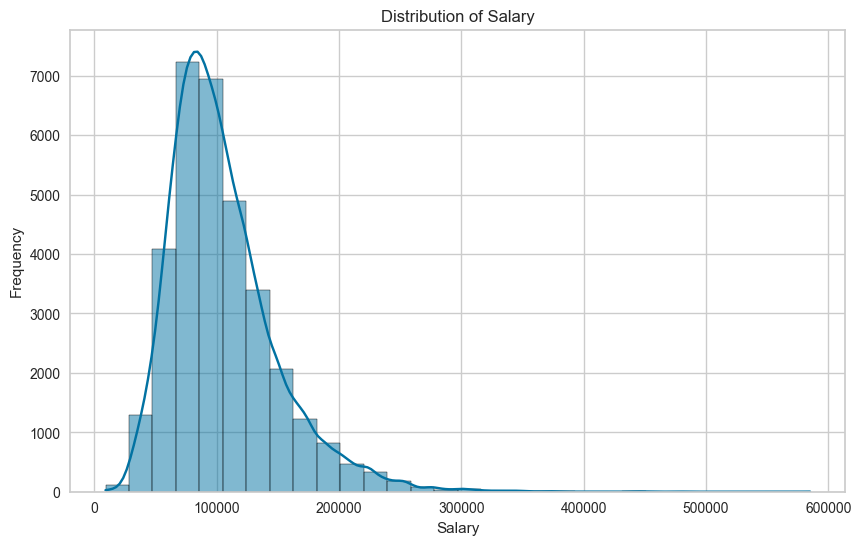

In [1677]:
# Visualizing target variable (salary)
plt.figure(figsize=(10, 6))
sns.histplot(train['Mean_Salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [1678]:
# Identify all columns and missing values
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
ID                      0
Job                     0
Jobs_Group              0
Profile             21107
Remote              19319
Company                 9
Location               13
City                 3824
State                3112
Frecuency_Salary        0
Mean_Salary             0
Skills                  0
Sector               7214
Sector_Group         7214
Revenue             18318
Employee            12799
Company_Score        8762
Reviews              8762
Director            20785
Director_Score      21924
URL                 16033
dtype: int64


In [1679]:
# Identify all columns and missing values in test
print("\nMissing Values:")
print(test.isnull().sum())


Missing Values:
ID                      0
Job                     0
Jobs_Group              0
Profile             14061
Remote              12822
Company                10
Location                8
City                 2625
State                2119
Frecuency_Salary        0
Skills                  0
Sector               4735
Sector_Group         4735
Revenue             12022
Employee             8418
Company_Score        5828
Reviews              5828
Director            13661
Director_Score      14464
URL                 10519
dtype: int64


In [1680]:
# Identify only columns with missing values
missing_data = train.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_data[missing_data > 0])


Columns with Missing Values:
Profile           21107
Remote            19319
Company               9
Location             13
City               3824
State              3112
Sector             7214
Sector_Group       7214
Revenue           18318
Employee          12799
Company_Score      8762
Reviews            8762
Director          20785
Director_Score    21924
URL               16033
dtype: int64


# 3. Data Cleaning for numeric columns (before encoding to avoid mean on ohe)

In [1681]:
# Identify numerical columns for train and test
train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns

print(test_numerical_cols)

Index(['Company_Score', 'Reviews', 'Director_Score'], dtype='object')


In [1682]:
# Function to impute missing values for numerical columns
def impute_numeric_col(data, numerical_cols):
    """
    Impute missing values in the specified numerical columns of a DataFrame with the mean.

    Parameters:
        data (pd.DataFrame): The DataFrame containing numerical columns.
        numerical_cols (list): List of numerical column names to impute.

    Returns:
        pd.DataFrame: The DataFrame with imputed numerical columns.
    """
    numerical_imputer = SimpleImputer(strategy='mean')
    data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])
    return data

# Identify numerical columns for train and test
train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values for train and test numerical columns
train = impute_numeric_col(train, train_numerical_cols)
test = impute_numeric_col(test, test_numerical_cols)

# Display the results
print("Imputed Train Data:")
train.head()

Imputed Train Data:


ID                                                Job  \
0  job_f2c807527f687b96  Part-time Reporting Business Analyst, Data & A...   
1  job_2660d4c53505af10                                         Controller   
2   sj_50358c44328ae06a                                 Sr Finance Analyst   
3  job_a087fd700e3e85f0               Senior Business Intelligence Analyst   
4  job_d2a2538a2c4d2033  Data Center Operations Analyst (Temporary Assi...   

              Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                                URL  
0        0.748707  https://www.sandyhookpromise.org/  
1        0.700000                                NaN  
2        0.748707                                NaN  
3        0.700000       https://www.richmondfed.org/  
4        0.850000                                NaN

In [1683]:

print("\nImputed Test Data:")
test.head()


Imputed Test Data:


ID                                                Job  \
0   sj_99ad4f80ae7f4835                           Business Analyst Manager   
1  job_6ff7f1a7c400916a                      Senior Program Budget Analyst   
2  job_e059d20eba88b17a  Senior AI Engineer - Multi-year CONTRACT ROLE ...   
3  job_79f7953813b13358        Data Scientist, Algorithmic Recommendations   
4  job_892dfe86b96f322b                Management & Budget Analyst-Finance   

          Jobs_Group Profile  Remote  \
0   Business Analyst    Lead  Remote   
1  Financial Analyst  Senior     NaN   
2     ML/AI Engineer  Senior  Hybrid   
3     Data Scientist     NaN  Remote   
4  Financial Analyst     NaN     NaN   

                                             Company  \
0                    Dryden Mutual Insurance Company   
1                                   Esphera Concepts   
2       Volkswagen Group of America - Chattanooga...   
3                                 The New York Times   
4  Metropolitan Government of Nashville & Davidso...   

                    Location        City State Frecuency_Salary  \
0           Dryden, NY 13053      Dryden    NY             year   
1  Washington, DC+1 location  Washington    DC             year   
2                Belmont, CA     Belmont    CA             year   
3                     Remote         NaN   NaN             year   
4              Nashville, TN   Nashville    TN             year   

                                              Skills  \
0         ['PowerPoint', 'Office', 'Excel', 'Agile']   
1  ['PowerPoint', 'Master', 'Word', 'Bachelor', '...   
2  ['Tensor Flow', 'Python', 'Master', 'PhD', 'C+...   
3           ['Google Cloud', 'Python', 'SQL', 'PhD']   
4  ['PowerPoint', 'Master', 'Word', 'Excel', 'Bac...   

                                         Sector          Sector_Group Revenue  \
0  Insurance Companies and Investment Societies             Insurance     NaN   
1                     Management and Consulting            Consulting     NaN   
2                                           NaN                   NaN     NaN   
3          Audiovisual and Media Communications  Media Communications      XL   
4                                           NaN                   NaN     NaN   

  Employee  Company_Score      Reviews               Director  Director_Score  \
0      NaN       5.000000     2.000000                    NaN        0.746766   
1       XS       3.654609  2593.057045                    NaN        0.746766   
2      NaN       3.654609  2593.057045                    NaN        0.746766   
3       XL       4.000000   275.000000  Meredith Kopit Levien        0.780000   
4      NaN       3.654609  2593.057045                    NaN        0.746766   

                                URL  
0                               NaN  
1  https://www.espheraconcepts.com/  
2                               NaN  
3          https://www.nytimes.com/  
4                               NaN

In [1684]:
# Check imputatoin of mean worked

train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns

print(train[train_numerical_cols].isnull().sum())
print(test[test_numerical_cols].isnull().sum())

Mean_Salary       0
Company_Score     0
Reviews           0
Director_Score    0
dtype: int64
Company_Score     0
Reviews           0
Director_Score    0
dtype: int64


# 3. Feature Selection (Put back in below randomforest feature selectoin dont delete)

# Separate features and target
X = train.drop(columns=['Mean_Salary'])  # Features
y = train['Mean_Salary']                # Target variable

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Encode categorical variables temporarily
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col], _ = X_encoded[col].factorize()

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_encoded, y)

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print("Top Features Based on Random Forest Importance:")
print(feature_importances.head(20))

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use a linear model to rank features
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_encoded, y)

# Get rankings of features
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("Top Features Based on RFE:")
print(rfe_ranking.head(20))

# 3.1 Flatten multivalued columns

In [1685]:
#check for multi or single values in rows! 
def check_column_values(data):
    """
    Checks each column in a DataFrame to determine if it contains single values or multivalues.
    
    Parameters:
        data (pd.DataFrame): The DataFrame to check.
        
    Returns:
        str: A string listing each column and its classification ('single' or 'multivalue') on a new line.
    """
    results = []
    
    for col in data.columns:
        # Get unique rows for the column and analyze them
        unique_values = data[col].dropna().unique()  # Ignore NaN
        
        # Check if any value in the column contains multivalues
        is_multivalue = False
        for value in unique_values:
            if isinstance(value, str):  # Check if it's a string
                # If the string contains characters indicative of multivalues (e.g., ',' or brackets)
                if ',' in value or '[' in value or ']' in value or '{' in value or '}' in value:
                    is_multivalue = True
                    break
        
        classification = 'multivalue' if is_multivalue else 'single'
        results.append(f"{col}: {classification}")
    
    return "\n".join(results)

result = check_column_values(train)
print(result)

ID: single
Job: multivalue
Jobs_Group: single
Profile: single
Remote: single
Company: multivalue
Location: multivalue
City: single
State: single
Frecuency_Salary: single
Mean_Salary: single
Skills: multivalue
Sector: multivalue
Sector_Group: single
Revenue: single
Employee: single
Company_Score: single
Reviews: single
Director: multivalue
Director_Score: single
URL: single


In [1686]:
#Count the amount of unique values in multivalue columns
def count_unique_multivalues(df, multivalue_columns):
    """
    Counts unique values across multivalued columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing multivalued columns.
        multivalue_columns (list): List of column names to process.
    
    Returns:
        dict: A dictionary with column names as keys and counts of unique values as values.
    """
    unique_counts = {}
    
    for col in multivalue_columns:
        # Flatten all values in the column
        all_values = []
        
        for row in df[col].dropna():
            if isinstance(row, str):  # Check if it's a string
                # Split by common delimiters like ',' or whitespace
                values = row.replace('[', '').replace(']', '').replace("'", '').split(',')
                all_values.extend([v.strip() for v in values])  # Strip whitespace
            
        # Count unique values
        unique_counts[col] = len(set(all_values))
    
    return unique_counts


# List of multivalued columns
multivalue_columns = ["Skills", "Location", "Sector", "Company", "Job", "Sector", "Director"]

# Get unique counts
unique_counts = count_unique_multivalues(train, multivalue_columns)

# Display results
print("Unique values in multivalued columns:")
for col, count in unique_counts.items():
    print(f"{col}: {count}")


Unique values in multivalued columns:
Skills: 99
Location: 12737
Sector: 147
Company: 14145
Job: 18028
Director: 2718


In [1687]:
#Flatten Columns you would like to based on feature selection and unique value count
def rearrange_dataset(train, test):
    #1.train 
    skills_list = []
    for i in range(len(train)):
        zip_list = train['Skills'][i].replace('[','').replace(']','').replace("'",'').replace(" ",'').split(',')
        dict_temp = {}
        str_ = ''
        for j in range(len(zip_list)):
            dict_temp[zip_list[j]] = 1
            str_ += zip_list[j] + " "
        dict_temp['skills_clean'] = str_    
        skills_list.append(dict_temp)
        
    train = pd.concat([train,pd.DataFrame(skills_list).fillna(0)],axis =1)  

    #1.test 
    skills_list = []
    for i in range(len(test)):
        zip_list = test['Skills'][i].replace('[','').replace(']','').replace("'",'').replace(" ",'').split(',')
        dict_temp = {}
        str_ = ''
        for j in range(len(zip_list)):
            dict_temp[zip_list[j]] = 1
            str_ += zip_list[j] + " "
        dict_temp['skills_clean'] = str_    
        skills_list.append(dict_temp)
        
    test = pd.concat([test,pd.DataFrame(skills_list).fillna(0)],axis =1)  
    
    
    return train, test

In [1688]:
%%time
train, test = rearrange_dataset(train, test)

CPU times: total: 188 ms
Wall time: 600 ms


In [1689]:
train.describe()

Mean_Salary  Company_Score        Reviews  Director_Score  \
count   33248.000000   33248.000000   33248.000000    33248.000000   
mean   104938.652004       3.659287    2724.875398        0.748707   
std     43891.461738       0.540266   11444.908718        0.064679   
min      9200.000000       1.000000       1.000000        0.060000   
25%     75000.000000       3.500000      30.000000        0.748707   
50%     96600.000000       3.659287     512.000000        0.748707   
75%    125000.000000       3.900000    2724.875398        0.748707   
max    585000.000000       5.000000  247915.000000        1.000000   

         Salesforce      Bachelor           SQL        Master  Dynamics365  \
count  33248.000000  33248.000000  33248.000000  33248.000000  33248.00000   
mean       0.031160      0.640911      0.264948      0.181545      0.01564   
std        0.173752      0.479741      0.441312      0.385475      0.12408   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        0.000000      0.000000      0.000000      0.000000      0.00000   
50%        0.000000      1.000000      0.000000      0.000000      0.00000   
75%        0.000000      1.000000      1.000000      0.000000      0.00000   
max        1.000000      1.000000      1.000000      1.000000      1.00000   

          Snowflake           AWS          Qlik           CFA         Azure  \
count  33248.000000  33248.000000  33248.000000  33248.000000  33248.000000   
mean       0.029897      0.069839      0.011850      0.010497      0.058560   
std        0.170304      0.254879      0.108214      0.101917      0.234803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                CPA          Word         Excel    PowerPoint       PowerBI  \
count  33248.000000  33248.000000  33248.000000  33248.000000  33248.000000   
mean       0.135858      0.099495      0.277069      0.120188      0.103796   
std        0.342643      0.299330      0.447558      0.325186      0.305000   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Tableau        Office           ERP           SAP        Access  \
count  33248.000000  33248.000000  33248.000000  33248.000000  33248.000000   
mean       0.115255      0.393377      0.072486      0.057206      0.078080   
std        0.319334      0.488507      0.259294      0.232240      0.268301   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               SSAS          SSIS         Agile       English           PHP  \
count  33248.000000  33248.000000  33248.000000  33248.000000  33248.000000   
mean       0.004512      0.017836      0.071252      0.050439      0.008031   
std        0.067017      0.132356      0.257250      0.218853      0.089254   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000    

In [1690]:
test.describe

<bound method NDFrame.describe of                          ID  \
0       sj_99ad4f80ae7f4835   
1      job_6ff7f1a7c400916a   
2      job_e059d20eba88b17a   
3      job_79f7953813b13358   
4      job_892dfe86b96f322b   
...                     ...   
22161  job_4ab2e5201b60cc15   
22162  job_b3a7cf40a22659ef   
22163  job_4e69acaf903b0276   
22164  job_816f279ea500ecd0   
22165  job_9861d87455c4a6a6   

                                                     Job         Jobs_Group  \
0                               Business Analyst Manager   Business Analyst   
1                          Senior Program Budget Analyst  Financial Analyst   
2      Senior AI Engineer - Multi-year CONTRACT ROLE ...     ML/AI Engineer   
3            Data Scientist, Algorithmic Recommendations     Data Scientist   
4                    Management & Budget Analyst-Finance  Financial Analyst   
...                                                  ...                ...   
22161                                   


# Check for missing values in categorical columns
categorical_missing = X[categorical_cols].isnull().sum()

# Filter to show only columns with missing values
categorical_missing = categorical_missing[categorical_missing > 0]

# Print the results
print("Categorical Columns with Missing Values:")
print(categorical_missing)

# Replace missing values in categorical columns with "unknown"
for col in categorical_cols:
    X[col] = X[col].fillna('unknown')

# Verify the replacements
print("Missing Values After Replacement:")
print(X[categorical_cols].isnull().sum())

# 5. Encoding features separately

In [1692]:
test['ID']

0         sj_99ad4f80ae7f4835
1        job_6ff7f1a7c400916a
2        job_e059d20eba88b17a
3        job_79f7953813b13358
4        job_892dfe86b96f322b
                 ...         
22161    job_4ab2e5201b60cc15
22162    job_b3a7cf40a22659ef
22163    job_4e69acaf903b0276
22164    job_816f279ea500ecd0
22165    job_9861d87455c4a6a6
Name: ID, Length: 22166, dtype: object

In [1693]:
train.shape

(33248, 121)

In [1694]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

def encode_data(train, test, target_column, threshold=139):
    train_encoded = train.copy()
    test_encoded = test.copy()

    # Preserve and drop the ID column if it exists
    id_column_train = train_encoded['ID'] if 'ID' in train_encoded.columns else None
    if 'ID' in train_encoded.columns:
        train_encoded = train_encoded.drop(columns=['ID'])

    id_column_test = test_encoded['ID'] if 'ID' in test_encoded.columns else None
    if 'ID' in test_encoded.columns:
        test_encoded = test_encoded.drop(columns=['ID'])


    # Separate the target column
    y_train = train_encoded.pop(target_column)

    # Identify categorical columns
    categorical_cols = train.select_dtypes(include=['object', 'category']).columns

    for col in categorical_cols:
        unique_count = train[col].nunique()

        if unique_count < threshold:
            # One-Hot Encoding
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            ohe.fit(train[[col]])

            ohe_columns = ohe.get_feature_names_out([col])
            ohe_train = pd.DataFrame(ohe.transform(train[[col]]), columns=ohe_columns, index=train.index)
            ohe_test = pd.DataFrame(ohe.transform(test[[col]]), columns=ohe_columns, index=test.index)

            # Align test columns to train columns
            ohe_test = ohe_test.reindex(columns=ohe_train.columns, fill_value=0)

            # Concatenate OHE columns to encoded datasets
            train_encoded = pd.concat([train_encoded.drop(columns=[col], errors='ignore'), ohe_train], axis=1)
            test_encoded = pd.concat([test_encoded.drop(columns=[col], errors='ignore'), ohe_test], axis=1)

        else:
            # Target Encoding
            target_encoder = TargetEncoder()
            train_encoded[f"TE_{col}"] = target_encoder.fit_transform(train[col], y_train)
            test_encoded[f"TE_{col}"] = target_encoder.transform(test[col])

            # Drop the original column
            train_encoded = train_encoded.drop(columns=[col], errors='ignore')
            test_encoded = test_encoded.drop(columns=[col], errors='ignore')

    # Align test columns to train columns
    test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

    # Add back the target and ID columns
    train_encoded[target_column] = y_train.reset_index(drop=True)
    if id_column_train is not None:
        train_encoded['ID'] = id_column_train.reset_index(drop=True)
    if id_column_test is not None:
        test_encoded['ID'] = id_column_test.reset_index(drop=True)

    return train_encoded, test_encoded


In [1695]:
# Encode train and test datasets
encoded_train, encoded_test = encode_data(train, test, target_column='Mean_Salary', threshold=139)

# Update train and test datasets
train = encoded_train
test = encoded_test

# Check results
print(train)

       Company_Score      Reviews  Director_Score  Salesforce  Bachelor  SQL  \
0           4.200000    20.000000        0.748707         1.0       1.0  0.0   
1           3.500000    58.000000        0.700000         0.0       1.0  1.0   
2           3.400000    88.000000        0.748707         0.0       1.0  0.0   
3           3.800000    30.000000        0.700000         0.0       1.0  0.0   
4           4.200000   186.000000        0.850000         0.0       0.0  0.0   
...              ...          ...             ...         ...       ...  ...   
33243       3.600000    38.000000        0.748707         0.0       0.0  0.0   
33244       3.300000    30.000000        0.748707         0.0       1.0  0.0   
33245       4.300000  4586.000000        0.748707         0.0       1.0  0.0   
33246       3.659287  2724.875398        0.748707         0.0       0.0  1.0   
33247       3.500000     4.000000        0.748707         0.0       1.0  1.0   

       Master  Dynamics365  Snowflake  

In [1696]:
print(test)

       Company_Score      Reviews  Director_Score  Salesforce  Bachelor  SQL  \
0           5.000000     2.000000        0.746766         0.0       0.0  0.0   
1           3.654609  2593.057045        0.746766         0.0       1.0  0.0   
2           3.654609  2593.057045        0.746766         0.0       0.0  0.0   
3           4.000000   275.000000        0.780000         0.0       0.0  1.0   
4           3.654609  2593.057045        0.746766         0.0       1.0  0.0   
...              ...          ...             ...         ...       ...  ...   
22161       4.000000    30.000000        0.746766         0.0       1.0  0.0   
22162       3.400000  1626.000000        0.670000         0.0       1.0  0.0   
22163       3.654609  2593.057045        0.746766         0.0       1.0  0.0   
22164       4.000000   720.000000        0.850000         0.0       1.0  1.0   
22165       3.600000  5092.000000        0.790000         0.0       0.0  0.0   

       Master  Dynamics365  Snowflake  

In [1697]:
test['ID']

0         sj_99ad4f80ae7f4835
1        job_6ff7f1a7c400916a
2        job_e059d20eba88b17a
3        job_79f7953813b13358
4        job_892dfe86b96f322b
                 ...         
22161    job_4ab2e5201b60cc15
22162    job_b3a7cf40a22659ef
22163    job_4e69acaf903b0276
22164    job_816f279ea500ecd0
22165    job_9861d87455c4a6a6
Name: ID, Length: 22166, dtype: object

In [1698]:
train.shape

(33248, 382)

In [1699]:
print(train['Mean_Salary'])

0        115000.000
1        185000.000
2         84500.000
3        111625.000
4        102690.400
            ...    
33243     47206.495
33244     79741.000
33245    119908.000
33246    115000.000
33247    155000.000
Name: Mean_Salary, Length: 33248, dtype: float64


In [1700]:
test['ID']

0         sj_99ad4f80ae7f4835
1        job_6ff7f1a7c400916a
2        job_e059d20eba88b17a
3        job_79f7953813b13358
4        job_892dfe86b96f322b
                 ...         
22161    job_4ab2e5201b60cc15
22162    job_b3a7cf40a22659ef
22163    job_4e69acaf903b0276
22164    job_816f279ea500ecd0
22165    job_9861d87455c4a6a6
Name: ID, Length: 22166, dtype: object

# min max scaler

In [1701]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def minmax_scale_data(train, test, target_column='Mean_Salary', id_column='ID'):
    """
    Min-Max scales numerical features in the train and test datasets, excluding the target column,
    ID column, and OHE columns (binary features).

    Parameters:
        train (pd.DataFrame): Training dataset.
        test (pd.DataFrame): Testing dataset.
        target_column (str): Name of the target column to exclude from scaling.
        id_column (str): Name of the ID column to exclude from scaling.

    Returns:
        train_scaled (pd.DataFrame): Scaled training dataset.
        test_scaled (pd.DataFrame): Scaled testing dataset.
    """
    # Preserve the ID and target columns if they exist
    train_id = train[id_column] if id_column in train.columns else None
    test_id = test[id_column] if id_column in test.columns else None
    train_target = train[target_column] if target_column in train.columns else None

    # Identify numerical columns excluding the target and ID columns
    numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols if col not in [target_column, id_column]]

    # Exclude OHE columns (binary features)
    non_ohe_numerical_cols = [
        col for col in numerical_cols
        if not (train[col].nunique() == 2 and set(train[col].unique()) <= {0, 1})
    ]

    # Ensure test dataset has the same numerical columns
    for col in non_ohe_numerical_cols:
        if col not in test.columns:
            test[col] = 0  # or np.nan if you'd like

    # Ensure train and test have the same column order
    test = test[non_ohe_numerical_cols]

    # Initialize Min-Max Scaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform both train and test
    train_scaled = train.copy()
    test_scaled = test.copy()

    train_scaled[non_ohe_numerical_cols] = scaler.fit_transform(train[non_ohe_numerical_cols])
    test_scaled[non_ohe_numerical_cols] = scaler.transform(test[non_ohe_numerical_cols])

    # Restore the ID and target columns if they exist
    if train_id is not None:
        train_scaled[id_column] = train_id
    if test_id is not None:
        test_scaled[id_column] = test_id
    if train_target is not None:
        train_scaled[target_column] = train_target

    return train_scaled, test_scaled

# Example usage:
# train_scaled, test_scaled = minmax_scale_data(train, test)
# print(train_scaled.head())


In [1702]:
train = train_scaled
test = test_scaled

In [1703]:
test['ID']

0         sj_99ad4f80ae7f4835
1        job_6ff7f1a7c400916a
2        job_e059d20eba88b17a
3        job_79f7953813b13358
4        job_892dfe86b96f322b
                 ...         
22161    job_4ab2e5201b60cc15
22162    job_b3a7cf40a22659ef
22163    job_4e69acaf903b0276
22164    job_816f279ea500ecd0
22165    job_9861d87455c4a6a6
Name: ID, Length: 22166, dtype: object

# 5. Train and Evaluate a Effective Model using PyCaret

In [1704]:
print(train)

       Company_Score   Reviews  Director_Score  Salesforce  Bachelor  SQL  \
0           0.800000  0.000077        0.732667         1.0       1.0  0.0   
1           0.625000  0.000230        0.680851         0.0       1.0  1.0   
2           0.600000  0.000351        0.732667         0.0       1.0  0.0   
3           0.700000  0.000117        0.680851         0.0       1.0  0.0   
4           0.800000  0.000746        0.840426         0.0       0.0  0.0   
...              ...       ...             ...         ...       ...  ...   
33243       0.650000  0.000149        0.732667         0.0       0.0  0.0   
33244       0.575000  0.000117        0.732667         0.0       1.0  0.0   
33245       0.825000  0.018494        0.732667         0.0       1.0  0.0   
33246       0.664822  0.010987        0.732667         0.0       0.0  1.0   
33247       0.625000  0.000012        0.732667         0.0       1.0  1.0   

       Master  Dynamics365  Snowflake  AWS  Qlik  CFA  Azure  CPA  Word  \


In [1705]:
from pycaret.regression import *
import pandas as pd

In [1706]:
# Initialize PyCaret
regression_setup = setup(
    data=train,
    target='Mean_Salary',            # Target variable
    train_size=0.8,                  # 80-20 train-test split within PyCaret
    #normalize=True,                  # Ensure features are scaled
    transformation=True,
    #remove_outliers=True,
    #outliers_method='ee',  
    #outliers_threshold=0.05,
    #normalize_method='minmax',
    #remove_multicollinearity=True,
    #feature_selection=True,
    #categorical_imputation='constant',
    #max_encoding_ohe=139,             # Set threshold for one-hot encoding
    session_id=42,                   # For reproducibility
)

In [1707]:
# Compare Models
best_model = compare_models(sort='MAPE', include=['gbr'])

In [1708]:
from pycaret.regression import save_model

# Save the best model
save_model(best_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Company_Score', 'Reviews',
                                              'Director_Score', 'Salesforce',
                                              'Bachelor', 'SQL', 'Master',
                                              'Dynamics365', 'Snowflake', 'AWS',
                                              'Qlik', 'CFA', 'Azure', 'CPA',
                                              'Word', 'Excel', 'PowerPoint',
                                              'PowerBI', 'Tableau', 'Office',
                                              'ERP', 'SAP', 'Access', 'SSAS',
                                              'SSIS', 'Agile', 'English', 'PHP'...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['ID'],
                                     tra

In [1709]:
from pycaret.regression import load_model

# Load the saved model
best_model = load_model('best_model')

Transformation Pipeline and Model Successfully Loaded


In [1710]:
# Tune the Best Model
#tuned_model = tune_model(best_model, optimize='MAPE')

In [1711]:
# Finalize and Save the Model
#final_model = finalize_model(tuned_model)
final_model = best_model

In [1712]:
# Display the performance of the tuned model
print("\nTuned Model Performance:")
evaluate_model(final_model)


Tuned Model Performance:


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [1713]:
import joblib

export_model = final_model

# Save the model
joblib.dump(export_model, 'exported_models.pkl')

['exported_models.pkl']

test.to_csv("processed_test_data.csv", index=False)

# 1. Run model on test data

In [1714]:
test['ID']

0         sj_99ad4f80ae7f4835
1        job_6ff7f1a7c400916a
2        job_e059d20eba88b17a
3        job_79f7953813b13358
4        job_892dfe86b96f322b
                 ...         
22161    job_4ab2e5201b60cc15
22162    job_b3a7cf40a22659ef
22163    job_4e69acaf903b0276
22164    job_816f279ea500ecd0
22165    job_9861d87455c4a6a6
Name: ID, Length: 22166, dtype: object

In [1715]:
# Keep the 'ID' column for submission
ids = test['ID']

In [1716]:
import joblib 

loaded_model = joblib.load('exported_models.pkl')

In [1717]:
train.shape

(33248, 382)

In [1718]:
test.shape

(22166, 381)

In [1719]:
print(len(test))

22166


In [1720]:
# Drop target column if present in test
if 'Mean_Salary' in test.columns:
    test = test.drop(columns=['Mean_Salary'])


In [1721]:
# Generate predictions
test_predictions = loaded_model.predict(test)


In [1722]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'ID': ids,
    'Mean_Salary': test_predictions
})

In [1723]:
submission.to_csv("submission.csv", index=False)